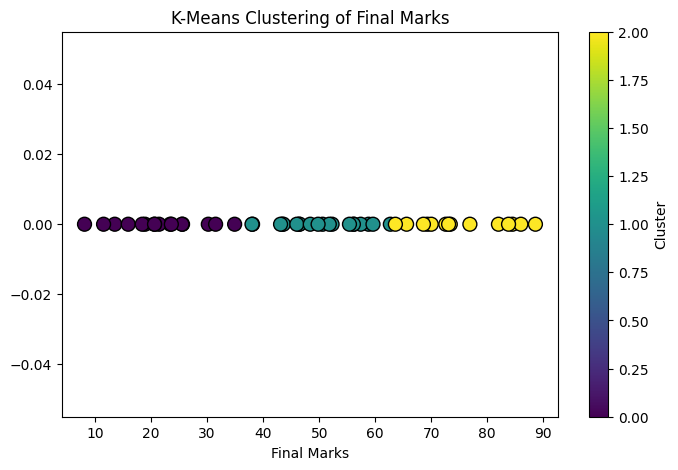

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#Create CSV files for term test results
num_students = 50
reg_numbers = [f"S{1000+i}" for i in range(num_students)]
names = [f"Student_{i+1}" for i in range(num_students)]
tt1_marks = np.random.randint(0, 20, num_students)
tt2_marks = np.random.randint(0, 20, num_students)

tt1_df = pd.DataFrame({'Registration Number': reg_numbers, 'Name': names, 'TT-1 Marks': tt1_marks})
tt2_df = pd.DataFrame({'Registration Number': reg_numbers, 'Name': names, 'TT-2 Marks': tt2_marks})

tt1_df.to_csv('term-test-1-result.csv', index=False)
tt2_df.to_csv('term-test-2-result.csv', index=False)

#Load both files into pandas dataframes
df_tt1 = pd.read_csv('term-test-1-result.csv')
df_tt2 = pd.read_csv('term-test-2-result.csv')

#Merge on 'Registration Number'
merged_df = pd.merge(df_tt1, df_tt2, on=['Registration Number', 'Name'])
merged_df['Best TT Marks'] = merged_df[['TT-1 Marks', 'TT-2 Marks']].max(axis=1)
merged_df['Average TT Marks'] = merged_df[['TT-1 Marks', 'TT-2 Marks']].mean(axis=1)

#Drop 'TT-1 Marks' and 'TT-2 Marks'
merged_df.drop(columns=['TT-1 Marks', 'TT-2 Marks'], inplace=True)

#Create an attendance and term final marks CSV
attendance_marks = np.random.randint(0, 10, num_students)
term_final_marks = np.random.randint(0, 100, num_students)

final_marks_df = pd.DataFrame({
    'Registration Number': reg_numbers,
    'Name': names,
    'Attendance Marks': attendance_marks,
    'Term Final Marks': term_final_marks
})
final_marks_df.to_csv('attendance-term-final.csv', index=False)

#Load and merge with the term test dataframe
final_df = pd.read_csv('attendance-term-final.csv')
final_merged_df = pd.merge(merged_df, final_df, on=['Registration Number', 'Name'])

#Compute Final Marks
final_merged_df['Final Marks'] = (final_merged_df['Term Final Marks'] * 0.7) + \
                                  final_merged_df['Average TT Marks'] + \
                                  final_merged_df['Attendance Marks']

#Save to 'final result.csv'
final_merged_df.to_csv('final result.csv', index=False)

#K-Means Clustering
k = 3  # You can change this between 2 to 5
X = final_merged_df[['Final Marks']]
kmeans = KMeans(n_clusters=k, random_state=42)
final_merged_df['Cluster'] = kmeans.fit_predict(X)

#Visualization
plt.figure(figsize=(8, 5))
plt.scatter(final_merged_df['Final Marks'], [0] * num_students, c=final_merged_df['Cluster'], cmap='viridis', s=100, edgecolors='k')
plt.xlabel('Final Marks')
plt.title('K-Means Clustering of Final Marks')
plt.colorbar(label='Cluster')
plt.show()
